### 선형대수

##### 행렬의 연산

* diag() : n x n 행렬의 대각/비대각 원소를 반환/1차원 배열을 대각 원소로 취함
* dot() : 행렬의 곱
* trace() : 대각원소의 합
* linarg.det() : 행렬식
* linarg.eig() : n x n 행렬의 고유값과 고유벡터
* linarg.inv() :  n x n 행렬의 역행렬
* linarg.pinv() : 무어-펜로즈 유사역원 역행렬
* linarg.qr() : QR분해
* inarg.svd() : 특이값 분해(SVD)
* linarg.solve() : 선형연립방정식 Ax=b 의 해 x
* linarg.lstsq() : 최소제곱해(회귀분석 등)

In [2]:
import numpy as np

A=np.arange(8).reshape(4,2)
B=np.array([[3,5,7,2],[4,3,6,2]])
C=np.array([[5,3,6,4],[7,1,3,4],[2,6,1,8],[3,6,8,6]])
print(A); print(B); print(C)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[3 5 7 2]
 [4 3 6 2]]
[[5 3 6 4]
 [7 1 3 4]
 [2 6 1 8]
 [3 6 8 6]]


In [3]:
print("AB\n{0}".format(np.dot(A,B))) # 행렬의 곱
print("diag(C)\n{0}".format(np.diag(C))) # 행렬 C의 대각 원소
print("diag(A[1]\n{0})".format(np.diag(A[1]))) # 행렬 A의 1행을 고정, 그걸 기준으로 대각 원소를 가지는 행렬
print("trace(A)\n{0}".format(np.trace(A))) # 행렬 A의 대각 원소의 합
print("det(C)\n{0}".format(np.linalg.det(C))) # 행렬 C의 행렬식

AB
[[ 4  3  6  2]
 [18 19 32 10]
 [32 35 58 18]
 [46 51 84 26]]
diag(C)
[5 1 1 6]
diag(A[1]
[[2 0]
 [0 3]])
trace(A)
3
det(C)
55.99999999999992


##### 선형 회귀 모델

데이터의 분포가 선형 방정식 형태로 나타내질 수있는 것

선형 연립방정식 : y(종속변수) = ax + b(여기서 b는 오차범위, 이 값은 아직 우리가 모른다고 가정하고 시작함)

y = ax + b    (y:종속변수 , x : 독립변수 , a : 회귀계수) 

여기서 a와 b의 값을 찾는 방법을 말한다.

> 선형 회귀분석 하는 순서는?

1. 회귀식을 구할 필요가 있는지를 검토하기 위하여 독립변수와 종속변수의 점그래프를 그려본다.

2. 회귀식 (선형 연립방정식)을 구한다.

3. 회귀식의 정도를 확인한다.

4. '회귀계수의 검정' 을 실행한다.

5. 모회귀 Ax + B 를 추정한다.

6. 예측한다.



##### 최소제곱법



각 데이터 포인트들에서 회귀식(선형 방정식) 과의 차이(잔차)가 최소가 되게 a,b를 구하는 방법

> 파이썬의 경우, 이 방법을 이용해서 a,b를 구한다.


1. Sxx (x의 편차의 제곱의 합) , Syy (y의 편차의 제곱의 합), Sxy(x와 y의 편차의 곱의 합) 을 구한다.

2. 잔차의 제곱의 합을 구한다. Sl 이라 하자.

3. Sl 을 각각 a 와 b 에 대해서 미분한 후 0 으로 놓는다. 

4. Step 3의 결과를 정리한다.

5. Step 4이 결과를 정리한다.

6. 회귀식을 구한다.


In [4]:
# 최소제곱 추정

y=np.array([2,4,6,3,7,1]) # 종속변수 정의
x=np.array([[1,2,3,7],[1,4,7,3],[1,7,8,3],[1,6,7,3],[1,8,4,3],[1,3,2,5]])
print("x\n{0}\ny\n{1}".format(x,y))
print("최소제곱추정량\n{0}".format(np.linalg.lstsq(x,y))) # 최소제곱 추정량

'''
출력값에서 최소제곱추정량이 array를 3개를 가지는데,
y = βX + b
첫번째 array : 회귀계수
두번째 array : SSE (Sum of Square Errors) : 연산 오차들의 합
'''

x
[[1 2 3 7]
 [1 4 7 3]
 [1 7 8 3]
 [1 6 7 3]
 [1 8 4 3]
 [1 3 2 5]]
y
[2 4 6 3 7 1]
최소제곱추정량
(array([-3.28559177,  0.97598628,  0.15780446,  0.35591767]), array([5.80102916]), 4, array([20.78612948,  6.20674118,  3.79004179,  0.22083505]))


C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [7]:
# 최소제곱 추정량2
# x=np.array([[1,2,3,7],[1,4,7,3],[1,7,8,3],[1,6,7,3],[1,8,4,3],[1,3,2,5]])
# y=np.array([2,4,6,3,7,1])

xt=x.T
# x의 전치행렬이므로 4x6 행렬
xpx=np.dot(xt,x)
# xt 행렬과 x 행렬의 곱 (내적)
np.dot(np.dot(np.linalg.inv(xpx),xt),y) # 최소제곱추정량
# xpx 행렬의 역행렬과 xt 를 곱한 값을, 다시 y 행렬과 곱해주면 최소제곱 추정량 추출


array([-3.28559177,  0.97598628,  0.15780446,  0.35591767])

In [8]:
# solve 메소드 : 연립방정식의 해

A=np.array([[1,3,4,5],[2,5,4,8],[3,6,7,4],[6,7,2,1]])
b=np.array([4,3,6,7])
print("Ax=b의 해 x : {0}".format(np.linalg.solve(A,b)))

Ax=b의 해 x : [ 6.7704918  -5.55737705  2.08196721  1.1147541 ]


##### 난수 생성

###### 확률분포 난수

* random.seed() : 난수 발생기의 시드값 설정
* random.permutation() : 순서를 임의로 바꾸거나 임의의 순열 반환
* random.shuffle() : 리스트나 배열의 순서 섞기
* random.rand(), random.uniform() : 균등분포(0,1), 균등분포(a,b)에서 난수 추출
* random.randint() : 주어진 최대~최소 범위에서 임의의 난수 추출
* random.randn(), random.normal() : 표준정규분포(0,1)와 정규분포(υ,σ)에서 난수 추출
* random.binomial() : 이항분포(n,p)에서 난수 추출
* random.beta() : 베타분포(a,b)에서 0~1사이 난수 추출
* random.chisquare() : 카이제곱분포(df)에서 난수 추출
* random.gamma() : 감마분포(k,θ)에서 난수 추출


    * 감마분포 : 확률변수 X가 a번째 사건이 일어날때까지 걸리는 시간으로 정의할때, 이 확률변수 X의 분포
    * 카이제곱분포 : a=r/2, b=2일때 변수가 r인 카이제곱분포를 따름.
        * 보통 모분산 구할때, 적합도 감정, 독립성/동질성 검정 하는 '범주형 자료분석' 에서 쓰임
    * 베타분포 : 베이지안 추론에서 해당 분포의 모수가 가질 수 있는 모든 경우의 수를 나타냄
        * 확률 추정할 때 보통 쓰임. 이항분포의 성공률을 추정할 때 주로 사용

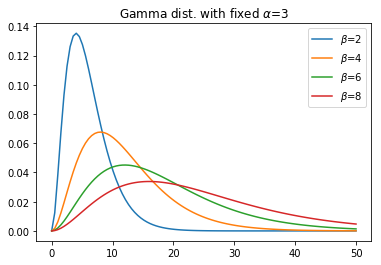

In [14]:
# 감마분포

# 여기서 alpha = shape parameter, beta = scale parameter 로 놓는다.

import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

alpha = [1, 3, 5, 7]
beta = [2, 4, 6, 8]

x = np.linspace (0, 50, 100)

for beta_ in beta:
    y = stats.gamma.pdf(x, a=alpha[1], scale=beta_)
    plt.plot(x, y, label=r'$\beta$'+'='+str(beta_))
plt.title('Gamma dist. with fixed '+r'$\alpha$'+'='+str(alpha[1]))
plt.legend(loc='upper right')
plt.show()

# a가 커질수록, 벨모양에 가까워지는것을 볼 수 있다.

In [9]:
norm_sample1=np.random.randn(20) # N(0,1)
norm_sample2=np.random.normal(size=20) # N(0,1)
norm_sample3=np.random.normal(loc=10, scale=2, size=(5,4)) # N(10,4)
print("randn\n{0}".format(norm_sample1))
print("normal(20)\n{0}\nnormal(size=(4,5))\n{1}".format(norm_sample2,norm_sample3))

randn
[-0.26035189 -0.2682593  -2.40084894  0.89046095  1.77890603  0.50994114
  0.2735841   0.3062758   0.10623568  1.12684956 -1.08405889 -0.98004738
 -0.30257237  0.43362052 -0.01898232  0.37044919  0.27736918 -0.5590933
  0.44713124 -0.18644425]
normal(20)
[ 0.41281604  1.97118169 -0.60340869 -0.46126411 -0.05639781 -0.68755011
 -0.22930991  0.69127135  0.62216592  0.68869749 -0.0930689   0.68143324
 -0.36886785 -1.41136208  0.05081278 -1.03193174 -0.38756197  2.23220002
  0.84822867 -0.4029684 ]
normal(size=(4,5))
[[ 8.48150094  8.87336038 10.20124663 10.72020811]
 [12.00127901 10.72381035 11.25622519  9.85764072]
 [ 9.72561187  7.70442493  8.02938765 11.59934297]
 [ 8.76931553  7.95006328 10.33270609  8.89682431]
 [13.07540835 11.57700548  8.75002553 11.05709415]]


In [10]:
np.random.seed(123456789)
uni_smp=np.random.uniform(low=0, high=10, size=4) # U(0,10)
bin_smp=np.random.binomial(n=10, p=0.3, size=(3,4)) # B(10,0,3)
chi_smp=np.random.chisquare(df=4, size=(2,5)) # X²(4)
gam_smp=np.random.gamma(shape=1, scale=1/4, size=5) # G(1,1/4)
print("균등분포(0,10)\n{0}\n이항분포(10,0,3)\n{1}".format(uni_smp,bin_smp))
print("카이제곱분포(4)\n{0}\n감마분포(1,1/4)\n{1}".format(chi_smp,gam_smp))

균등분포(0,10)
[5.32833025 5.34136601 5.09553036 7.13564032]
이항분포(10,0,3)
[[2 4 5 2]
 [4 3 4 4]
 [4 1 0 2]]
카이제곱분포(4)
[[4.89656665 2.06869189 1.5887399  0.60789645 1.66034714]
 [1.60859599 3.1919838  6.89788231 2.68421259 4.23945028]]
감마분포(1,1/4)
[0.34382022 0.63130631 0.062266   1.54785696 0.23082665]
